https://towardsdatascience.com/softmax-regression-in-python-multi-class-classification-3cb560d90cb2
    
In this article, we are going to look at the Softmax Regression which is used for multi-class classification problems, and implement it on the MNIST hand-written digit recognition dataset.

First, we will build on Logistic Regression to understand the Softmax function, then we will look at the Cross-entropy loss, one-hot encoding, and code it alongside. Finally, we will code the training function(fit) and see our accuracy. We will also plot our predictions.


Now, we set a goal for us — To identify which digit is in the image.

We will use the MNIST hand-written dataset as a motivating example to understand Softmax Regression. It has 10 classes each representing a digit from 0 to 9. Let us look at the dataset first.

Loading MNIST dataset from keras.datasets and plotting. Also, splitting the training and test set. It has 60,000 examples in the training set and 10,000 examples in the test set.

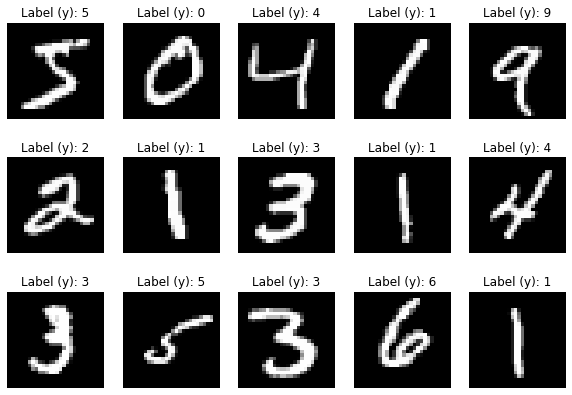

In [21]:
#Loading
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
#Plotting
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')

In [22]:
np.shape(train_X)

(60000, 28, 28)

In [23]:
np.shape(train_y)

(60000,)

# One-hot Encoding

train_y - array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

It is a NumPy array with labels. We cannot use this for our model, we have to somehow modify it into zeros and ones which is what we call one-hot encoding. We want our y to look like this (a matrix of size 60,000 x 10)—

In [24]:
def one_hot(y, c):
    
    # y--> label/ground truth.
    # c--> Number of classes.
    
    # A zero matrix of size (m, c)
    y_hot = np.zeros((len(y), c))
    
    # Putting 1 for column where the label is,
    # Using multidimensional indexing.
    y_hot[np.arange(len(y)), y] = 1
    
    return y_hot

# Softmax Function

In [25]:
def softmax(z):
    
    # z--> linear part.
    
    # subtracting the max of z for numerical stability.
    exp = np.exp(z - np.max(z))
    
    # Calculating softmax for all examples.
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
        
    return exp

# Cross-Entropy Loss

L = -sum_{c=1}^c y_c log(yhat_c)

loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))

# Training 

In [26]:
def fit(X, y, lr, c, epochs):
    
    # X --> Input.
    # y --> true/target value.
    # lr --> Learning rate.
    # c --> Number of classes.
    # epochs --> Number of iterations.
    
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias randomly.
    w = np.random.random((n, c))
    b = np.random.random(c)
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        
        # Calculating hypothesis/prediction.
        z = X@w + b
        y_hat = softmax(z)
        
        # One-hot encoding y.
        y_hot = one_hot(y, c)
        
        # Calculating the gradient of loss w.r.t w and b.
        w_grad = (1/m)*np.dot(X.T, (y_hat - y_hot)) 
        b_grad = (1/m)*np.sum(y_hat - y_hot)
        
        # Updating the parameters.
        w = w - lr*w_grad
        b = b - lr*b_grad
        
        # Calculating loss and appending it in the list.
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y])) # loss function 
        losses.append(loss)
        # Printing out the loss at every 100th iteration.
        if epoch%100==0:
            print('Epoch {epoch}==> Loss = {loss}'
                  .format(epoch=epoch, loss=loss))
    return w, b, losses

# Training mnist data

In [27]:
# Flattening the image.
X_train = train_X.reshape(60000,28*28)
# Normalizing. 
X_train = X_train/255
# Training
w, b, l = fit(X_train, train_y, lr=0.9, c=10, epochs=1000)

Epoch 0==> Loss = 3.851015227544006
Epoch 100==> Loss = 0.4105458831269462
Epoch 200==> Loss = 0.35662924430221776
Epoch 300==> Loss = 0.333322018991683
Epoch 400==> Loss = 0.3196450173271641
Epoch 500==> Loss = 0.31038575672737
Epoch 600==> Loss = 0.30355567327394917
Epoch 700==> Loss = 0.2982224850764553
Epoch 800==> Loss = 0.2938885725284827
Epoch 900==> Loss = 0.29026240080595167


# Predicting

In [28]:
def predict(X, w, b):
    
    # X --> Input.
    # w --> weights.
    # b --> bias.
    
    # Predicting
    z = X@w + b
    y_hat = softmax(z)
    
    # Returning the class with highest probability.
    return np.argmax(y_hat, axis=1)

# accuracy 
def accuracy(y, y_hat):
    return np.sum(y==y_hat)/len(y)

In [33]:
# Accuracy for training set.
train_preds = predict(X_train, w, b)
accuracy(train_y, train_preds)
# >> 0.9187666
# Accuracy for test set.
# Flattening and normalizing.
X_test = test_X.reshape(10000,28*28)
X_test = X_test/255
test_preds = predict(X_test, w, b)
accuracy(test_y, test_preds)
# >> 0.9173

0.9157

# plotting predictions

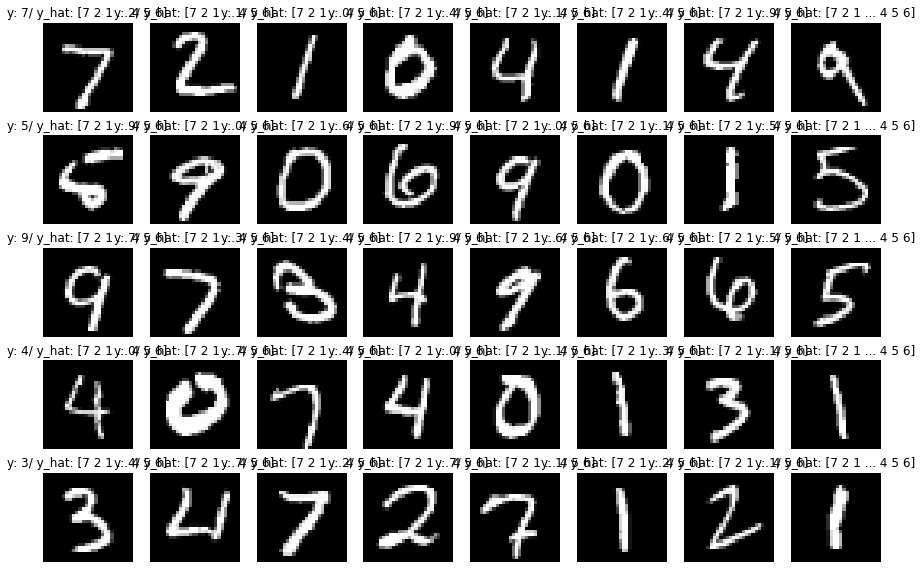

In [34]:
fig = plt.figure(figsize=(15,10))
for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    
    ax.set_title('y: {y}/ y_hat: {y_hat}'
                 .format(y=test_y[i], y_hat=test_preds))
    plt.axis('off')